In [2]:
import pickle
import os
import re
import fnmatch
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    
    return results

In [13]:
test = [1,2,3,4]

In [17]:
for i in range(len(test)-4):
    print(test[i])

In [16]:
test[-1]

4

# Training and Validation Curves

In [8]:
filebase = ("amino_short__epochs_2__att_10_hidden_15_10_5_drop_0-300_L2_0-000100_LR_0-001000_ntrain_03_rot_*_results.pkl") #Select this ntraining number resultsresultsList = read_all_rotations('results/P1', filebase) #Read all of those into resultsList
resultsList = read_all_rotations('results', filebase) #Read all of those into resultsList


In [19]:
resultsList[0]['history'].keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [20]:
resultsList[0]['history']['sparse_categorical_accuracy']

[0.5293086171150208]

In [21]:
resultsList[0]['history']['val_sparse_categorical_accuracy']

[0.9107406139373779]

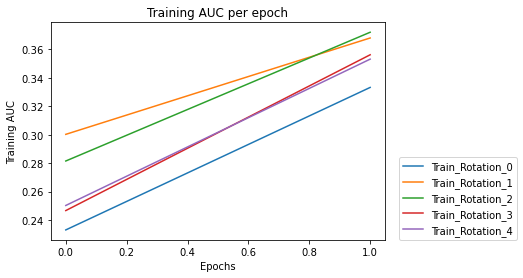

In [9]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['sparse_categorical_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training AUC')
plt.xlabel('Epochs')
plt.title("Training AUC per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

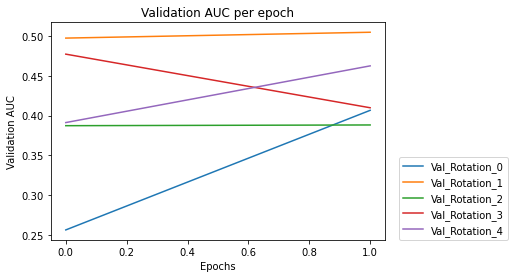

In [10]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_sparse_categorical_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation AUC')
plt.xlabel('Epochs')
plt.title("Validation AUC per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

In [29]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['binary_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure3.png')
plt.show()

KeyError: 'binary_accuracy'

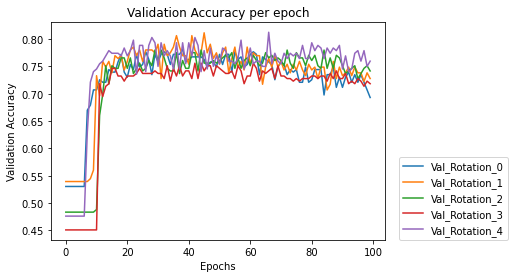

In [75]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_binary_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure4.png')
plt.show()

# Homework code

In [ ]:
for i in range(len(resultsShallowNoAugment)):
    plt.plot(resultsShallowNoAugment[i]['history']['categorical_accuracy'],color='green', label='Shallow Network')
    plt.plot(resultsShallow[i]['history']['categorical_accuracy'], color='blue', label='Shallow Network + Augmentation')

    
handles, labels = plt.gca().get_legend_handles_labels()

# labels will be the keys of the dict, handles will be values
temp = {k:v for k,v in zip(labels, handles)}

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(temp.values(), temp.keys(), loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

In [ ]:
for i in range(len(resultsShallowNoAugment)):
    plt.plot(resultsShallowNoAugment[i]['history']['val_categorical_accuracy'],color='green', label='Shallow Network')
    plt.plot(resultsShallow[i]['history']['val_categorical_accuracy'], color='blue', label='Shallow Network + Augmentation')

    
handles, labels = plt.gca().get_legend_handles_labels()

# labels will be the keys of the dict, handles will be values
temp = {k:v for k,v in zip(labels, handles)}

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(temp.values(), temp.keys(), loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

# Histograms of Test Results

In [76]:
def getResults(resultsList, index):
    trainList = [] # Create an empty list to hold values
    valList = [] # Create an empty list to hold values
    testList = [] # Create an empty list to hold values

    for i in range(len(resultsList)): # For each result in the 5 rotations
        trainList.append(resultsList[i]['predict_training_eval'][index]) 
        valList.append(resultsList[i]['predict_validation_eval'][index]) 
        testList.append(resultsList[i]['predict_testing_eval'][index]) 
    
    return trainList, valList, testList
    

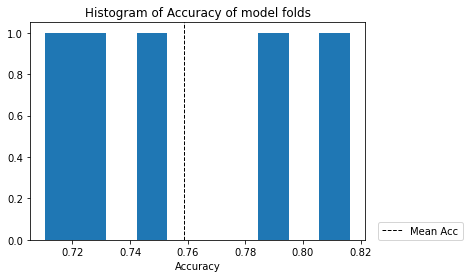

In [81]:
plt.hist([simpleModel], bins=10, alpha=0.5, label=['Simple Model'])
plt.hist([complexModel], bins=10, alpha=0.5, label=['Complex Model'])
#plt.axvline(np.mean(testAcc), color='k', linestyle='dashed', linewidth=1, label='Mean Acc')
plt.legend(loc=(1.04,0))
plt.xlabel('Accuracy')
plt.title("Histogram of Accuracy of model folds")
plt.savefig('Figure3.png')
plt.show()